# ÌîÑÎ°úÏ†ùÌä∏ - Movielens ÏòÅÌôî SBR

### Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [1]:
import os
import datetime as dt
from pathlib import Path

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data/') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # dataÎ•º idÏôÄ ÏãúÍ∞Ñ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìï¥Ï§çÎãàÎã§.
data

UserId  ItemId  Rating       Time
31            1    3186       4  978300019
22            1    1270       5  978300055
27            1    1721       4  978300055
37            1    1022       5  978300055
24            1    2340       3  978300103
...         ...     ...     ...        ...
1000019    6040    2917       4  997454429
999988     6040    1921       4  997454464
1000172    6040    1784       3  997454464
1000167    6040     161       3  997454486
1000042    6040    1221       4  998315055

[1000209 rows x 4 columns]

Ïú†Ï†Ä ID : 6040Í∞ú

ÏïÑÏù¥ÌÖú ID : 3706Í∞ú

In [3]:
data['UserId'].nunique(), data['ItemId'].nunique()

(6040, 3706)

### Session Length

In [4]:
user_length = data.groupby('UserId').size()   # Ìïú Ïú†Ï†ÄIDÍ∞Ä Î™á Í∞úÏùò ÏòÅÌôîÏóê ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞Î•º ÎÇ®Í≤ºÎäîÏßÄ
user_length

UserId
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

In [5]:
user_length.median(), user_length.mean()   # ÌèâÍ∑† Ìïú Ïú†Ï†ÄID Îãπ ÏïΩ 165Í∞ú ÌèâÏ†êÏùÑ ÎÇ®ÍπÄ, Ï§ëÏïôÍ∞íÏùÄ 96Í∞ú

(96.0, 165.5975165562914)

In [6]:
user_length.min(), user_length.max()  # ÏµúÏÜå 20Í∞ú, ÏµúÎåÄ 2314Í∞ú

(20, 2314)

In [7]:
user_length.quantile(0.999)           # 99.9%Ïùò Ïú†Ï†ÄÎì§ÏùÄ 1343Í∞ú Ïù¥ÌïòÏùò ratingÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.

1343.181000000005

In [8]:
user_length.quantile(0.9999) 

2033.790399999547

In [9]:
plt.figure(figsize=(20,6))
plt.boxplot(user_length, vert=0)
plt.show()

In [10]:
length_count = user_length.groupby(user_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_999 = length_percent_cumsum[length_percent_cumsum < 0.999]

length_percent_cumsum_999

20      0.014238
21      0.029305
22      0.042053
23      0.055464
24      0.068874
          ...   
1271    0.998179
1277    0.998344
1286    0.998510
1302    0.998675
1323    0.998841
Length: 736, dtype: float64

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(x=length_percent_cumsum_999.index,
        height=length_percent_cumsum_999, color='skyblue')
#plt.xticks(length_percent_cumsum_999.index)
#plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.999', size=20)
plt.show()

In [12]:
# Ïñ¥Îñ§ ÏòÅÌôîÏóê ÏÑ∏ÏÖò ÏàòÍ∞Ä ÎßéÏùÄÏßÄ Î≥¥Í≤†ÏäµÎãàÎã§
mv_count = data.groupby('ItemId')['UserId'].count()
mv_count.sort_values(ascending=False).head(10)

ItemId
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: UserId, dtype: int64

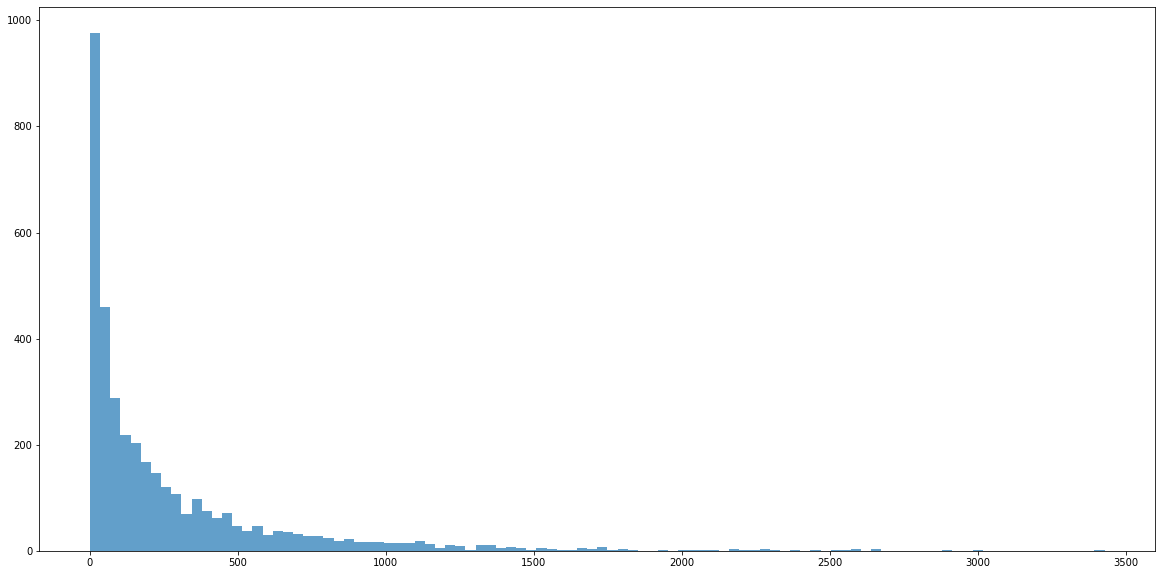

In [13]:
plt.figure(figsize=(20,10))
plt.hist(mv_count, bins=100, density=False, alpha=0.7, histtype='stepfilled')
plt.show()

In [14]:
long_rating = user_length[user_length==2314].index[0]
data[data['UserId']==long_rating]

UserId  ItemId  Rating        Time
696969    4169    1268       5   965333392
697168    4169    2617       4   965333392
697185    4169    2628       4   965333392
697219    4169    2653       4   965333392
697275    4169     423       3   965333392
...        ...     ...     ...         ...
697882    4169    3754       2  1024174347
695702    4169    1413       3  1024175031
697358    4169     494       4  1024175760
695945    4169    1804       2  1024175783
696446    4169    1548       3  1024176337

[2314 rows x 4 columns]

### Session Time

In [15]:
import datetime

In [16]:
# Ïö∞ÏÑ† Time Ïª¨ÎüºÏù¥ Î≥¥Í∏∞Í∞Ä ÌûòÎìúÎãà Date Î°ú Î∞îÍøîÏÑú Î≥¥Í≤†ÏäµÎãàÎã§

dt = datetime.datetime.strptime('1970-01-01', '%Y-%m-%d')
tmp = data['Time']
datatime = []
for i in tmp:
    date = dt + datetime.timedelta(seconds= i)
    tmp = date.strftime('%Y-%m-%d')
    datatime.append(tmp)

data['Date'] = datatime

In [17]:
data

UserId  ItemId  Rating       Time        Date
31            1    3186       4  978300019  2000-12-31
22            1    1270       5  978300055  2000-12-31
27            1    1721       4  978300055  2000-12-31
37            1    1022       5  978300055  2000-12-31
24            1    2340       3  978300103  2000-12-31
...         ...     ...     ...        ...         ...
1000019    6040    2917       4  997454429  2001-08-10
999988     6040    1921       4  997454464  2001-08-10
1000172    6040    1784       3  997454464  2001-08-10
1000167    6040     161       3  997454486  2001-08-10
1000042    6040    1221       4  998315055  2001-08-20

[1000209 rows x 5 columns]

In [18]:
oldest, latest = data['Date'].min(), data['Date'].max()
print(oldest) 
print(latest)

2000-04-25
2003-02-28


* 2000ÎÖÑ 4ÏõîÎ∂ÄÌÑ∞ 2003ÎÖÑ 2ÏõîÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞ÏûÑÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. 

In [19]:
yr2000 = data[data['Date'].str.contains('2000')]
yr2001 = data[data['Date'].str.contains('2001')]
yr2002 = data[data['Date'].str.contains('2002')]
yr2003 = data[data['Date'].str.contains('2003')]

In [20]:
print(len(yr2000))
print(len(yr2001))
print(len(yr2002))
print(len(yr2003))

904757
68058
24046
3348


* ÏãúÍ∞Ñ ÌùêÎ¶ÑÏóê Îî∞Î•∏ ÏòÅÌôî ÏÑ†Ìò∏ Ìï® Î≥¥Í∏∞
* Ï†ÑÏ≤¥ Í∏∞Í∞ÑÏóêÏÑú ÌèâÏ†êÏù¥ ÎßéÏù¥ ÎÇ®Í≤®ÏßÑ ÏòÅÌôî

In [21]:
#ÏòÅÌôî ÌèâÏ†ê Î∂ÑÌè¨ ÌôïÏù∏

mv_rate = data.groupby('Rating')['ItemId'].count()
mv_rate

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: ItemId, dtype: int64

In [22]:
# 2000ÎÖÑÎèÑÏóê Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏòÅÌôîÎäî?
mv_count0 = yr2000.groupby('ItemId')['UserId'].count()
mv_count0.sort_values(ascending=False).head(10)

ItemId
2858    3291
1196    2846
260     2834
1210    2772
480     2559
589     2547
2028    2538
1270    2448
2571    2446
1580    2433
Name: UserId, dtype: int64

In [23]:
# 2001ÎÖÑÎèÑÏóê Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏòÅÌôîÎäî?
mv_count1 = yr2001.groupby('ItemId')['UserId'].count()
mv_count1.sort_values(ascending=False).head(10)

ItemId
3897    266
3578    241
3751    213
3948    211
3317    199
3911    181
3408    179
3863    157
3793    151
3753    151
Name: UserId, dtype: int64

In [24]:
# 2002ÎÖÑÎèÑÏóê Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏòÅÌôîÎäî?
mv_count2 = yr2002.groupby('ItemId')['UserId'].count()
mv_count2.sort_values(ascending=False).head(10)

ItemId
3897    68
3911    67
3949    57
3317    57
1393    56
1265    52
3948    49
3578    48
2628    48
2959    46
Name: UserId, dtype: int64

In [25]:
# 2003ÎÖÑÎèÑÏóê Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî ÏòÅÌôîÎäî?
mv_count3 = yr2003.groupby('ItemId')['UserId'].count()
mv_count3.sort_values(ascending=False).head(10)

ItemId
2011    14
2959    12
3948    12
2502    12
2012    11
3911    11
1095    11
2028    10
750     10
2300     9
Name: UserId, dtype: int64

### Rating score

In [26]:
# Í∞ÄÏû• ÎÜíÏùÄ ÌèâÏ†êÏùÑ Í∞ÄÏßÑ ÏòÅÌôîÎäî Î¨¥ÏóáÏù∏Í∞Ä
# ÌèâÏ†ê ÏàúÏúºÎ°ú Ï§ÑÏÑ∏ÏõåÎ≥¥Í∏∞
#ÏòÅÌôî ÌèâÏ†ê Î∂ÑÌè¨ ÌôïÏù∏

mv_rate = data.groupby('Rating')['ItemId'].count()
mv_rate

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: ItemId, dtype: int64

In [27]:
yr2000_rate = yr2000.groupby('Rating')['ItemId'].count()
yr2000_rate

Rating
1     51027
2     96069
3    234296
4    314446
5    208919
Name: ItemId, dtype: int64

In [28]:
yr2001_rate = yr2001.groupby('Rating')['ItemId'].count()
yr2001_rate

Rating
1     3539
2     7986
3    19150
4    24839
5    12544
Name: ItemId, dtype: int64

In [29]:
yr2002_rate = yr2002.groupby('Rating')['ItemId'].count()
yr2002_rate

Rating
1    1356
2    3113
3    6898
4    8500
5    4179
Name: ItemId, dtype: int64

In [30]:
yr2003_rate = yr2003.groupby('Rating')['ItemId'].count()
yr2003_rate

Rating
1     252
2     389
3     853
4    1186
5     668
Name: ItemId, dtype: int64

In [31]:
orginal_data_size = len(data)
orginal_data_size

1000209

In [32]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Rating 3Ï†ê Ïù¥ÏÉÅÎßå ÎÇ®Í∏∞Í≤†ÏäµÎãàÎã§.

data = data[data['Rating']>=3]

filtered_data_size = len(data)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [33]:
data[data['Rating']==2]

Empty DataFrame
Columns: [UserId, ItemId, Rating, Time, Date]
Index: []

In [34]:
data[data['Rating']==1]

Empty DataFrame
Columns: [UserId, ItemId, Rating, Time, Date]
Index: []

Ï†úÍ±∞Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

### Data Cleansing

In [35]:
# ÏïûÏÑú ÎßêÌñàÎìØÏù¥ ÎÑàÎ¨¥ Í∏¥ ÏÑ∏ÏÖòÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäî UserIDÎ•º Ï†úÍ±∞Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
# ÎÇ®Í∏¥ ÌèâÏ†êÏù¥ Ï†ÅÎã§Í≥† Ìï¥ÏÑú ÏÑ†Ìò∏ÌïòÎäî ÏòÅÌôîÍ∞Ä ÏïÑÎãàÎùºÎäî Í±¥ ÏïÑÎãàÍ∏∞ÎèÑ ÌïòÍ≥† Ï†ÅÏùÄ ÌèâÏ†êÏùÑ Í∞ÄÏßÑ ÏòÅÌôîÍ∞Ä ÎåÄÎ∂ÄÎ∂ÑÏù¥Í∏∞ÎèÑ ÌïòÍ∏∞ÎïåÎ¨∏Ïóê 
# Îã§Î•∏ cleansing Ï≤òÎ¶¨Îäî ÌïòÏßÄ ÏïäÏäµÎãàÎã§.

def cleanse_long_session(data: pd.DataFrame, longest):
    session_len = data.groupby('UserId').size()
    session_use = session_len[session_len < longest].index
    data = data[data['UserId'].isin(session_use)]
    return data

def cleanse_recursive(data: pd.DataFrame, longest) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_long_session(data, longest)
        after_len = len(data)
        if before_len == after_len:
            break
    return data

In [36]:
data = cleanse_recursive(data, 2314)

In [37]:
user_length = data.groupby('UserId').size()   # Ìïú Ïú†Ï†ÄIDÍ∞Ä Î™á Í∞úÏùò ÏòÅÌôîÏóê ÌèâÏ†ê Îç∞Ïù¥ÌÑ∞Î•º ÎÇ®Í≤ºÎäîÏßÄ

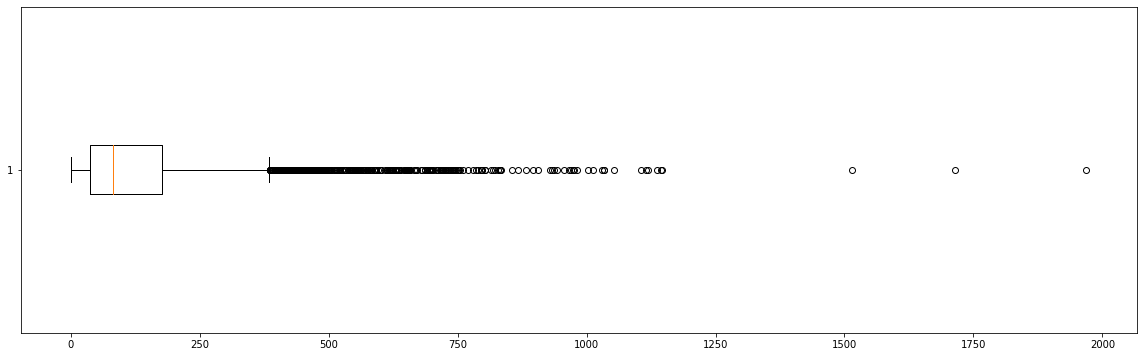

In [38]:
plt.figure(figsize=(20,6))
plt.boxplot(user_length, vert=0)
plt.show()

### Train/ Valid/ Test split

In [39]:
data['Date'].max()

'2003-02-28'

In [40]:
data.groupby('UserId')['Date'].max()

UserId
1       2001-01-06
2       2000-12-31
3       2000-12-31
4       2000-12-31
5       2000-12-31
           ...    
6036    2000-04-26
6037    2000-04-27
6038    2000-04-26
6039    2000-04-26
6040    2001-08-20
Name: Date, Length: 6039, dtype: object

In [41]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

def split_by_month(data: pd.DataFrame, n_months: int):
    final_time = pd.to_datetime(data['Date'].max())
    #print(final_time)
    session_last_time = data.groupby('UserId')['Date'].max()
    tmp = final_time - relativedelta(months = n_months)   # Îß® ÎÅù ÎÇ†ÏßúÏóêÏÑú nÍ∞úÏõîÏùÑ Î∫çÎãàÎã§
    tmpdate = tmp.strftime('%Y-%m-%d') # string ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
    #print(tmp)
    session_in_train = session_last_time[session_last_time < tmpdate].index
    session_in_test = session_last_time[session_last_time >= tmpdate].index
    
    before_date = data[data['UserId'].isin(session_in_train)]
    after_date = data[data['UserId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [42]:
train, test = split_by_month(data, n_months=14)
train, valid = split_by_month(train, n_months=8)

In [43]:
#train = pd.concat([yr2000,yr2001], ignore_index=True)
train

UserId  ItemId  Rating       Time        Date
31           1    3186       4  978300019  2000-12-31
22           1    1270       5  978300055  2000-12-31
27           1    1721       4  978300055  2000-12-31
37           1    1022       5  978300055  2000-12-31
24           1    2340       3  978300103  2000-12-31
...        ...     ...     ...        ...         ...
999798    6039    1148       4  956758002  2000-04-26
999764    6039     912       4  956758029  2000-04-26
999771    6039     922       5  956758029  2000-04-26
999815    6039    1204       5  956758029  2000-04-26
999826    6039    1254       4  956758029  2000-04-26

[590449 rows x 5 columns]

In [44]:
train['Date'].max()

'2001-04-25'

In [45]:
valid

UserId  ItemId  Rating       Time        Date
2469         19    2527       3  978146700  2000-12-30
2298         19     593       5  978146713  2000-12-30
2432         19     527       3  978146727  2000-12-30
2457         19    1210       4  978146747  2000-12-30
2497         19    2115       3  978146747  2000-12-30
...         ...     ...     ...        ...         ...
1000019    6040    2917       4  997454429  2001-08-10
999988     6040    1921       4  997454464  2001-08-10
1000172    6040    1784       3  997454464  2001-08-10
1000167    6040     161       3  997454486  2001-08-10
1000042    6040    1221       4  998315055  2001-08-20

[63883 rows x 5 columns]

In [46]:
test

UserId  ItemId  Rating        Time        Date
2522        20    2028       4   978143106  2000-12-30
2516        20    1617       5   978143181  2000-12-30
2515        20      47       5   978143306  2000-12-30
2514        20    3578       5   978143344  2000-12-30
2501        20    3863       3   978143355  2000-12-30
...        ...     ...     ...         ...         ...
994100    6002    2013       4  1014524679  2002-02-24
993890    6002    2520       4  1014524680  2002-02-24
994045    6002    1387       5  1014524720  2002-02-24
993900    6002    1927       4  1014524758  2002-02-24
994050    6002     101       4  1014524817  2002-02-24

[182046 rows x 5 columns]

In [47]:
# dataÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Users: {data["UserId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Date"].min()}\n'
          f'\t Last Time : {data["Date"].max()}\n')

In [48]:
stats_info(train, 'train')
stats_info(valid, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 590449
	 Users: 5150
	 Items: 3556
	 First Time : 2000-04-25
	 Last Time : 2001-04-25

* valid Set Stats Info
	 Events: 63883
	 Users: 300
	 Items: 3076
	 First Time : 2000-04-25
	 Last Time : 2001-12-26

* test Set Stats Info
	 Events: 182046
	 Users: 589
	 Items: 3381
	 First Time : 2000-04-27
	 Last Time : 2003-02-28



In [49]:
# train setÏóê ÏóÜÎäî ÏïÑÏù¥ÌÖúÏù¥ val, testÍ∏∞Í∞ÑÏóê ÏÉùÍ∏∏ Ïàò ÏûàÏúºÎØÄÎ°ú train dataÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïù∏Îç±Ïã±Ìï©ÎãàÎã§.
id2idx = {item_id : index for index, item_id in enumerate(train['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1))  # id2idxÏóê ÏóÜÎäî ÏïÑÏù¥ÌÖúÏùÄ Î™®Î•¥Îäî Í∞í(-1) Ï≤òÎ¶¨ Ìï¥Ï§çÎãàÎã§.
    return df

train = indexing(train, id2idx)
valid = indexing(valid, id2idx)
test = indexing(test, id2idx)

In [50]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

train.to_pickle(save_path / 'train.pkl')
valid.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

## ÎØ∏Îãà Î∞∞ÏπòÏùò Íµ¨ÏÑ±

Session-Parallel Mini BatchÎ•º Íµ¨ÌòÑ

Ïó¨Í∏∞ÏÑúÎäî SessionÏù¥ ÏïÑÎãå UserID Í∏∞Î∞ò

In [51]:
class SessionDataset:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['UserId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['UserId'].nunique() + 1, dtype=np.int32)
        offsets[1:] = self.df.groupby('UserId').size().cumsum()
        return offsets

In [52]:
train_dataset = SessionDataset(train)
train_dataset.df.head(10)

UserId  ItemId  Rating       Time        Date  item_idx
31       1    3186       4  978300019  2000-12-31         0
22       1    1270       5  978300055  2000-12-31         1
27       1    1721       4  978300055  2000-12-31         2
37       1    1022       5  978300055  2000-12-31         3
24       1    2340       3  978300103  2000-12-31         4
36       1    1836       5  978300172  2000-12-31         5
3        1    3408       4  978300275  2000-12-31         6
7        1    2804       5  978300719  2000-12-31         7
47       1    1207       4  978300719  2000-12-31         8
0        1    1193       5  978300760  2000-12-31         9

In [53]:
train_dataset.click_offsets

array([     0,     53,    169, ..., 590312, 590330, 590449], dtype=int32)

In [54]:
train_dataset.session_idx

array([   0,    1,    2, ..., 5147, 5148, 5149])

### Session DataLoader

UserDataset Í∞ùÏ≤¥Î•º Î∞õÏïÑÏÑú Session-Parallel mini-batchÎ•º ÎßåÎìúÎäî ÌÅ¥ÎûòÏä§Î•º ÎßåÎì¶

maskÎäî ÌõÑÏóê RNN Cell StateÎ•º Ï¥àÍ∏∞Ìôî ÌïòÎäîÎç∞ ÏÇ¨Ïö©

In [55]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize Î©îÏÜåÎìúÏóêÏÑú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # Ï≤´ Î∞∞ÏπòÏóê ÏÇ¨Ïö©Ìï† ÏÑ∏ÏÖò IndexÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        last_session = self.batch_size - 1    # ÎßàÏßÄÎßâÏúºÎ°ú Îã§Î£®Í≥† ÏûàÎäî ÏÑ∏ÏÖò IndexÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§.
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data ÏÉÅÏóêÏÑú sessionÏù¥ ÏãúÏûëÎêú ÏúÑÏπòÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # sessionÏù¥ ÎÅùÎÇú ÏúÑÏπò Î∞îÎ°ú Îã§Ïùå ÏúÑÏπòÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        mask = np.array([])   # sessionÏùò Î™®Îì† ÏïÑÏù¥ÌÖúÏùÑ Îã§ ÎèåÏùÄ Í≤ΩÏö∞ maskÏóê Ï∂îÍ∞ÄÌï¥Ï§Ñ Í≤ÉÏûÖÎãàÎã§.
        finished = False         # dataÎ•º Ï†ÑÎ∂Ä ÎèåÏïòÎäîÏßÄ Í∏∞Î°ùÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàòÏûÖÎãàÎã§.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # Îã§Ïùå Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉÅÌÉúÎ•º updateÌï©ÎãàÎã§.
        
        start += min_len   # __iter__ÏóêÏÑú min_len ÎßåÌÅº forÎ¨∏ÏùÑ ÎèåÏïòÏúºÎØÄÎ°ú startÎ•º min_len ÎßåÌÅº ÎçîÌï¥Ï§çÎãàÎã§.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # endÎäî Îã§Ïùå ÏÑ∏ÏÖòÏù¥ ÏãúÏûëÎêòÎäî ÏúÑÏπòÏù∏Îç∞ startÏôÄ Ìïú Ïπ∏ Ï∞®Ïù¥ÎÇúÎã§Îäî Í≤ÉÏùÄ sessionÏù¥ ÎÅùÎÇ¨Îã§Îäî ÎúªÏûÖÎãàÎã§. maskÏóê Í∏∞Î°ùÌï¥Ï§çÎãàÎã§.

        for i, idx in enumerate(mask, start=1):  # maskÏóê Ï∂îÍ∞ÄÎêú ÏÑ∏ÏÖò Í∞úÏàòÎßåÌÅº ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏùÑ ÎèåÍ≤ÉÏûÖÎãàÎã§.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # ÎßåÏïΩ ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏù¥ ÎßàÏßÄÎßâ ÏÑ∏ÏÖò indexÎ≥¥Îã§ ÌÅ¨Îã§Î©¥ Î™®Îì† ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î•º Îèà Í≤ÉÏûÖÎãàÎã§.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # Ï¢ÖÎ£åÎêú ÏÑ∏ÏÖò ÎåÄÏã† ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏùò ÏãúÏûëÏ†êÏùÑ Í∏∞Î°ùÌï©ÎãàÎã§.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # ÎßàÏßÄÎßâ ÏÑ∏ÏÖòÏùò ÏúÑÏπòÎ•º Í∏∞Î°ùÌï¥Îë°ÎãàÎã§.
        return start, end, mask, last_session, finished

In [56]:
train_data_loader = SessionDataLoader(train_dataset, batch_size=4)
train_dataset.df.head(15)

UserId  ItemId  Rating       Time        Date  item_idx
31       1    3186       4  978300019  2000-12-31         0
22       1    1270       5  978300055  2000-12-31         1
27       1    1721       4  978300055  2000-12-31         2
37       1    1022       5  978300055  2000-12-31         3
24       1    2340       3  978300103  2000-12-31         4
36       1    1836       5  978300172  2000-12-31         5
3        1    3408       4  978300275  2000-12-31         6
7        1    2804       5  978300719  2000-12-31         7
47       1    1207       4  978300719  2000-12-31         8
0        1    1193       5  978300760  2000-12-31         9
21       1     720       3  978300760  2000-12-31        10
44       1     260       4  978300760  2000-12-31        11
9        1     919       4  978301368  2000-12-31        12
51       1     608       4  978301398  2000-12-31        13
43       1    2692       4  978301570  2000-12-31        14

In [57]:
train_data_loader = SessionDataLoader(train_dataset, batch_size=4)
train_dataset.df.head(15)

UserId  ItemId  Rating       Time        Date  item_idx
31       1    3186       4  978300019  2000-12-31         0
22       1    1270       5  978300055  2000-12-31         1
27       1    1721       4  978300055  2000-12-31         2
37       1    1022       5  978300055  2000-12-31         3
24       1    2340       3  978300103  2000-12-31         4
36       1    1836       5  978300172  2000-12-31         5
3        1    3408       4  978300275  2000-12-31         6
7        1    2804       5  978300719  2000-12-31         7
47       1    1207       4  978300719  2000-12-31         8
0        1    1193       5  978300760  2000-12-31         9
21       1     720       3  978300760  2000-12-31        10
44       1     260       4  978300760  2000-12-31        11
9        1     919       4  978301368  2000-12-31        12
51       1     608       4  978301398  2000-12-31        13
43       1    2692       4  978301570  2000-12-31        14

In [58]:
iter_ex = iter(train_data_loader)

In [59]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [ 0 53 64 54]
Label Item Idx are :       [ 1 54 62 24]
Previous Masked Input Idx are []


## Î™®Îç∏ Íµ¨ÏÑ±

In [60]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [62]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [63]:
class Args:
    def __init__(self, train, valid, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.train = train
        self.valid = valid
        self.test = test
        self.num_items = train['ItemId'].nunique()
        self.num_sessions = train['UserId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(train, valid, test, batch_size=256, hsz=50, drop_rate=0.1, lr=0.001, epochs=50, k=20)

In [64]:
model = create_model(args)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(256, 1, 3556)]          0         
_________________________________________________________________
GRU (GRU)                    [(256, 50), (256, 50)]    541200    
_________________________________________________________________
dropout (Dropout)            (256, 50)                 0         
_________________________________________________________________
dense (Dense)                (256, 3556)               181356    
Total params: 722,556
Trainable params: 722,556
Non-trainable params: 0
_________________________________________________________________


## Î™®Îç∏ ÌïôÏäµ

In [65]:
# train ÏÖãÏúºÎ°ú ÌïôÏäµÌïòÎ©¥ÏÑú valid ÏÖãÏúºÎ°ú Í≤ÄÏ¶ùÌï©ÎãàÎã§.
def train_model(model, args):
    train_dataset = SessionDataset(args.train)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.train) - args.train['UserId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # Ï¢ÖÎ£åÎêú sessionÏùÄ hidden_stateÎ•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§. ÏïÑÎûò Î©îÏÑúÎìúÏóêÏÑú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.

            input_ohe = to_categorical(feat, num_classes=args.num_items)
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.valid, model, args, args.k)  # valid setÏóê ÎåÄÌï¥ Í≤ÄÏ¶ùÌï©ÎãàÎã§.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # modelÏóêÏÑú gru layerÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
    hidden_states = gru_layer.states[0].numpy()  # gru_layerÏùò parameterÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
    for elt in mask:  # maskÎêú Ïù∏Îç±Ïä§ Ï¶â, Ï¢ÖÎ£åÎêú ÏÑ∏ÏÖòÏùò Ïù∏Îç±Ïä§Î•º ÎèåÎ©¥ÏÑú
        hidden_states[elt, :] = 0  # parameterÎ•º Ï¥àÍ∏∞Ìôî Ìï©ÎãàÎã§.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # validÏÖãÍ≥º testÏÖãÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§. 
                                             # trainÍ≥º Í±∞Ïùò Í∞ôÏßÄÎßå mrr, recallÏùÑ Íµ¨ÌïòÎäî ÎùºÏù∏Ïù¥ ÏûàÏäµÎãàÎã§.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['UserId'].nunique()
    for inputs, label, mask in tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1):
        reset_hidden_states(model, mask)
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax Í∞íÏù¥ ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï©ÎãàÎã§.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

In [66]:
train_model(model, args)

Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [01:08<04:12,  1.29s/it]


	 - Recall@20 epoch 1: 0.161483
	 - MRR@20    epoch 1: 0.039322



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [01:04<03:55,  1.21s/it]


	 - Recall@20 epoch 2: 0.267468
	 - MRR@20    epoch 2: 0.070965



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [01:02<03:50,  1.18s/it]


	 - Recall@20 epoch 3: 0.312721
	 - MRR@20    epoch 3: 0.087414



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [01:01<03:45,  1.16s/it]


	 - Recall@20 epoch 4: 0.334242
	 - MRR@20    epoch 4: 0.097209



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [01:00<03:43,  1.15s/it]


	 - Recall@20 epoch 5: 0.349646
	 - MRR@20    epoch 5: 0.103781



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:39,  1.13s/it]


	 - Recall@20 epoch 6: 0.358196
	 - MRR@20    epoch 6: 0.109299



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 7: 0.363060
	 - MRR@20    epoch 7: 0.112247



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [01:00<03:41,  1.14s/it]


	 - Recall@20 epoch 8: 0.367335
	 - MRR@20    epoch 8: 0.114108



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [01:00<03:41,  1.13s/it]


	 - Recall@20 epoch 9: 0.370430
	 - MRR@20    epoch 9: 0.116728



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:40,  1.13s/it]


	 - Recall@20 epoch 10: 0.369988
	 - MRR@20    epoch 10: 0.118452



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 11: 0.370873
	 - MRR@20    epoch 11: 0.119715



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 12: 0.372052
	 - MRR@20    epoch 12: 0.121336



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:40,  1.13s/it]


	 - Recall@20 epoch 13: 0.374189
	 - MRR@20    epoch 13: 0.122595



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:40,  1.13s/it]


	 - Recall@20 epoch 14: 0.374263
	 - MRR@20    epoch 14: 0.122775



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 15: 0.376621
	 - MRR@20    epoch 15: 0.123303



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:40,  1.13s/it]


	 - Recall@20 epoch 16: 0.374042
	 - MRR@20    epoch 16: 0.123478



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:40,  1.13s/it]


	 - Recall@20 epoch 17: 0.375811
	 - MRR@20    epoch 17: 0.123822



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:37,  1.12s/it]


	 - Recall@20 epoch 18: 0.375074
	 - MRR@20    epoch 18: 0.123643



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:39,  1.13s/it]


	 - Recall@20 epoch 19: 0.375221
	 - MRR@20    epoch 19: 0.123872



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:34,  1.10s/it]


	 - Recall@20 epoch 20: 0.374189
	 - MRR@20    epoch 20: 0.123089



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:34,  1.10s/it]


	 - Recall@20 epoch 21: 0.375369
	 - MRR@20    epoch 21: 0.123970



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:34,  1.10s/it]


	 - Recall@20 epoch 22: 0.375737
	 - MRR@20    epoch 22: 0.123974



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:34,  1.10s/it]


	 - Recall@20 epoch 23: 0.377948
	 - MRR@20    epoch 23: 0.124334



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:33,  1.10s/it]


	 - Recall@20 epoch 24: 0.377874
	 - MRR@20    epoch 24: 0.124638



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:37,  1.12s/it]


	 - Recall@20 epoch 25: 0.377432
	 - MRR@20    epoch 25: 0.124887



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:36,  1.11s/it]


	 - Recall@20 epoch 26: 0.379201
	 - MRR@20    epoch 26: 0.124087



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:37,  1.12s/it]


	 - Recall@20 epoch 27: 0.378096
	 - MRR@20    epoch 27: 0.124950



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 28: 0.377948
	 - MRR@20    epoch 28: 0.124531



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:37,  1.12s/it]


	 - Recall@20 epoch 29: 0.376474
	 - MRR@20    epoch 29: 0.123748



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.10s/it]


	 - Recall@20 epoch 30: 0.378169
	 - MRR@20    epoch 30: 0.124163



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 31: 0.377653
	 - MRR@20    epoch 31: 0.124518



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.11s/it]


	 - Recall@20 epoch 32: 0.376032
	 - MRR@20    epoch 32: 0.124122



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 33: 0.377653
	 - MRR@20    epoch 33: 0.124311



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.10s/it]


	 - Recall@20 epoch 34: 0.378169
	 - MRR@20    epoch 34: 0.124333



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:34,  1.10s/it]


	 - Recall@20 epoch 35: 0.376179
	 - MRR@20    epoch 35: 0.123892



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.10s/it]


	 - Recall@20 epoch 36: 0.377580
	 - MRR@20    epoch 36: 0.123813



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:36,  1.11s/it]


	 - Recall@20 epoch 37: 0.376843
	 - MRR@20    epoch 37: 0.123930



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:37,  1.12s/it]


	 - Recall@20 epoch 38: 0.377285
	 - MRR@20    epoch 38: 0.124151



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:38,  1.12s/it]


	 - Recall@20 epoch 39: 0.376990
	 - MRR@20    epoch 39: 0.123530



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.10s/it]


	 - Recall@20 epoch 40: 0.375958
	 - MRR@20    epoch 40: 0.124029



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:36,  1.11s/it]


	 - Recall@20 epoch 41: 0.377653
	 - MRR@20    epoch 41: 0.123824



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.11s/it]


	 - Recall@20 epoch 42: 0.376990
	 - MRR@20    epoch 42: 0.123623



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:36,  1.11s/it]


	 - Recall@20 epoch 43: 0.377211
	 - MRR@20    epoch 43: 0.123414



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.11s/it]


	 - Recall@20 epoch 44: 0.376695
	 - MRR@20    epoch 44: 0.123192



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.10s/it]


	 - Recall@20 epoch 45: 0.375442
	 - MRR@20    epoch 45: 0.123535



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:34,  1.10s/it]


	 - Recall@20 epoch 46: 0.376106
	 - MRR@20    epoch 46: 0.123231



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.11s/it]


	 - Recall@20 epoch 47: 0.375590
	 - MRR@20    epoch 47: 0.123388



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:59<03:39,  1.12s/it]


	 - Recall@20 epoch 48: 0.374779
	 - MRR@20    epoch 48: 0.122945



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.11s/it]


	 - Recall@20 epoch 49: 0.373305
	 - MRR@20    epoch 49: 0.122827



Evaluation:  21%|‚ñà‚ñà‚ñè       | 53/248 [00:58<03:35,  1.10s/it]

	 - Recall@20 epoch 50: 0.374853
	 - MRR@20    epoch 50: 0.123109



## Î™®Îç∏ ÌÖåÏä§Ìä∏

In [67]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 473/708 [09:21<04:38,  1.19s/it]

	 - Recall@20: 0.282381
	 - MRR@20: 0.085909



### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≥ÄÍ≤Ω Î™®Îç∏

In [68]:
args = Args(train, valid, test, batch_size=128, hsz=50, drop_rate=0.4, lr=0.01, epochs=30, k=20)

In [69]:
model = create_model(args)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(128, 1, 3556)]          0         
_________________________________________________________________
GRU (GRU)                    [(128, 50), (128, 50)]    541200    
_________________________________________________________________
dropout_1 (Dropout)          (128, 50)                 0         
_________________________________________________________________
dense_1 (Dense)              (128, 3556)               181356    
Total params: 722,556
Trainable params: 722,556
Non-trainable params: 0
_________________________________________________________________


In [70]:
train_model(model, args)

Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:01<02:07,  1.61it/s]


	 - Recall@20 epoch 1: 0.270726
	 - MRR@20    epoch 1: 0.071381



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:07,  1.61it/s]


	 - Recall@20 epoch 2: 0.280257
	 - MRR@20    epoch 2: 0.075170



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:06,  1.62it/s]


	 - Recall@20 epoch 3: 0.286539
	 - MRR@20    epoch 3: 0.077555



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 4: 0.289116
	 - MRR@20    epoch 4: 0.078035



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 5: 0.287693
	 - MRR@20    epoch 5: 0.078698



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:07,  1.61it/s]


	 - Recall@20 epoch 6: 0.289492
	 - MRR@20    epoch 6: 0.079187



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 7: 0.289062
	 - MRR@20    epoch 7: 0.079047



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 8: 0.290593
	 - MRR@20    epoch 8: 0.077739



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:07,  1.61it/s]


	 - Recall@20 epoch 9: 0.289197
	 - MRR@20    epoch 9: 0.077839



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 10: 0.291559
	 - MRR@20    epoch 10: 0.078899



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 11: 0.290029
	 - MRR@20    epoch 11: 0.079104



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:58<02:05,  1.63it/s]


	 - Recall@20 epoch 12: 0.291345
	 - MRR@20    epoch 12: 0.078212



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 13: 0.290297
	 - MRR@20    epoch 13: 0.078213



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:07,  1.61it/s]


	 - Recall@20 epoch 14: 0.287908
	 - MRR@20    epoch 14: 0.077628



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:07,  1.61it/s]


	 - Recall@20 epoch 15: 0.290163
	 - MRR@20    epoch 15: 0.078821



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:07,  1.61it/s]


	 - Recall@20 epoch 16: 0.290969
	 - MRR@20    epoch 16: 0.078713



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 17: 0.291962
	 - MRR@20    epoch 17: 0.078746



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:00<02:07,  1.61it/s]


	 - Recall@20 epoch 18: 0.289948
	 - MRR@20    epoch 18: 0.078707



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 19: 0.291855
	 - MRR@20    epoch 19: 0.079213



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:58<02:06,  1.63it/s]


	 - Recall@20 epoch 20: 0.292230
	 - MRR@20    epoch 20: 0.078734



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 21: 0.287828
	 - MRR@20    epoch 21: 0.078370



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:57<02:05,  1.64it/s]


	 - Recall@20 epoch 22: 0.291828
	 - MRR@20    epoch 22: 0.079552



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 23: 0.289304
	 - MRR@20    epoch 23: 0.078632



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 24: 0.286458
	 - MRR@20    epoch 24: 0.078022



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:01<02:07,  1.61it/s]


	 - Recall@20 epoch 25: 0.289036
	 - MRR@20    epoch 25: 0.078360



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 26: 0.289599
	 - MRR@20    epoch 26: 0.078053



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:58<02:06,  1.63it/s]


	 - Recall@20 epoch 27: 0.291452
	 - MRR@20    epoch 27: 0.078787



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]


	 - Recall@20 epoch 28: 0.289787
	 - MRR@20    epoch 28: 0.078540



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:58<02:05,  1.63it/s]


	 - Recall@20 epoch 29: 0.291237
	 - MRR@20    epoch 29: 0.078765



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [02:59<02:06,  1.62it/s]

	 - Recall@20 epoch 30: 0.288096
	 - MRR@20    epoch 30: 0.079198



In [71]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1181/1417 [12:24<02:28,  1.59it/s]

	 - Recall@20: 0.237054
	 - MRR@20: 0.063168



### Î™®Îç∏ Íµ¨Ï°∞ (loss Ï¢ÖÎ•ò) Î≥ÄÍ≤Ω

In [72]:
from tensorflow.keras.losses import mse

def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=mse, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [73]:
args = Args(train, valid, test, batch_size=128, hsz=50, drop_rate=0.1, lr=0.001, epochs=10, k=20)

In [74]:
model = create_model(args)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(128, 1, 3556)]          0         
_________________________________________________________________
GRU (GRU)                    [(128, 50), (128, 50)]    541200    
_________________________________________________________________
dropout_2 (Dropout)          (128, 50)                 0         
_________________________________________________________________
dense_2 (Dense)              (128, 3556)               181356    
Total params: 722,556
Trainable params: 722,556
Non-trainable params: 0
_________________________________________________________________


In [75]:
train_model(model, args)

Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:22<02:22,  1.44it/s]


	 - Recall@20 epoch 1: 0.068218
	 - MRR@20    epoch 1: 0.013653



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:20<02:20,  1.45it/s]


	 - Recall@20 epoch 2: 0.069561
	 - MRR@20    epoch 2: 0.014070



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:19<02:20,  1.46it/s]


	 - Recall@20 epoch 3: 0.070178
	 - MRR@20    epoch 3: 0.014118



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:20<02:21,  1.45it/s]


	 - Recall@20 epoch 4: 0.070339
	 - MRR@20    epoch 4: 0.014135



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:22<02:22,  1.44it/s]


	 - Recall@20 epoch 5: 0.070581
	 - MRR@20    epoch 5: 0.014145



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:19<02:20,  1.46it/s]


	 - Recall@20 epoch 6: 0.070474
	 - MRR@20    epoch 6: 0.014131



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:20<02:21,  1.45it/s]


	 - Recall@20 epoch 7: 0.070420
	 - MRR@20    epoch 7: 0.014126



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:20<02:21,  1.45it/s]


	 - Recall@20 epoch 8: 0.070339
	 - MRR@20    epoch 8: 0.014123



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:20<02:21,  1.45it/s]


	 - Recall@20 epoch 9: 0.070420
	 - MRR@20    epoch 9: 0.014121



Evaluation:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 291/496 [03:22<02:22,  1.43it/s]

	 - Recall@20 epoch 10: 0.070420
	 - MRR@20    epoch 10: 0.014115



In [76]:

def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

test_model(model, args, test)

Evaluation:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 1181/1417 [13:42<02:44,  1.44it/s]

	 - Recall@20: 0.047470
	 - MRR@20: 0.009189



# [E-16] ÌöåÍ≥†

Ïù¥Î≤à ÏùµÏä§ÎèÑüòÖüòÖ ÌòºÏûê Ìï¥Í≤∞ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Î¨∏Ï†úÍ∞Ä ÏÉùÍ≤®ÏÑú Îã§Î•∏ Î∂ÑÏùò ÍπÉÌóàÎ∏åÎ•º Ï∞∏Í≥† ÌñàÏäµÎãàÎã§.

https://github.com/hyunnie94/AIFFEL/blob/master/E17_SessionBasedRecommendation/%5BE17%5D%20Movielens%20Session%20Based%20Recommendation.ipynb


Î≥ÄÎ™ÖÏïÑÎãå Î≥ÄÎ™Ö, ÌïëÍ≥ÑÏïÑÎãå ÌïëÍ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ÌÜ§ÏùÑ ÎÅùÎÇ¥Í≥† ÎÇòÎãàÍπå Î®∏Î¶¨ÏÜçÏóê ÎÇ®ÏïÑÏûàÎäî ÎÇ¥Ïö©Ïù¥ Í±∞Ïùò ÎÇ®ÏïÑÏûàÏßÄ ÏïäÏïÑÏÑú,
Îã§Î•∏ Î∂ÑÏùò ÍπÉÌóàÎ∏åÎ•º Î≥¥Îãà Ïñ¥ÎäêÏ†ïÎèÑ Í∏∞ÏñµÏù¥ ÎÇòÎ©¥ÏÑú, Ïù¥Ìï¥Í∞Ä ÎêòÎçîÎùºÍµ¨Ïöî.

Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâÌïòÎäî Í≥ºÏ†ïÏóêÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞Îäî ÏÇ≠Ï†úÌïòÍ≥†, ÎØ∏Îãà Î∞∞ÏπòÎ•º Ìï† Îïå ÎèÑÏõÄÏùÑ Î∞õÏúºÎãà
Ïù¥Î≤à ÏùµÏä§ÎèÑ Î¨¥ÏÇ¨Ìûà Ìï¥Í≤∞Ìïú Í≤É Í∞ôÏäµÎãàÎã§.

Î¨¥ÏÇ¨Ìûà Ïûò Ìï¥Í≤∞ÌñàÏúºÎãà Í≥ºÏ†ú Ï†úÏ∂úÏóê Í∏âÍ∏âÌï¥ÏÑú Ïù¥Ìï¥Í∞Ä Ïñ¥Î†§Ïõ†Îçò Î∂ÄÎ∂ÑÏùÄ Îã§ÏãúÎ≥¥Î†§Í≥† Ìï©ÎãàÎãπüòÇ
Î∞ÄÎ†∏Îçò Ïò§ÎãµÎèÑ ÏñºÎ•∏ÏñºÎ•∏ ÎÅùÎÇ¥Ïïº Í≤†ÎÑ§Ïöîüî•üî•üî•